### Importing Libraries

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.
D:\DS\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\DS\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\DS\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\DS\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is de

### Loading dataset

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

### Data information

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
some_digit = x[36000]
some_digit_image  = some_digit.reshape(28,28)

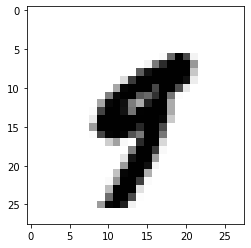

In [7]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary, interpolation='nearest')

### Data preprocessing

In [8]:
x_train, x_test = x[:60000], x[60000:]

In [9]:
y_train,y_test = y[:60000], y[60000:]

In [10]:
suffle_index = np.random.permutation(60000)
x_train,y_train = x_train[suffle_index], y_train[suffle_index]

In [11]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

### Modelling

In [12]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Prediction

In [13]:
y_predict = model.predict(x_test)

### Model Evaluation

In [14]:
accuracy_score(y_test,y_predict)

0.9688

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

